# Forecasting

## Forecasting with the Holt-Winters Method

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
%matplotlib inline

df = pd.read_csv('../Data/airline_passengers.csv',index_col='Month',parse_dates=True)
df.index.freq = 'MS'
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [2]:
df.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


There are 144 data points across 12 years (1949-1960), we will split 75% for training and 25% for testing, so 108 entries for training and rest are testing samples.

## Train Test Split

In [4]:
train_data = df.iloc[:108] #goes up to but not include 108
test_data = df.iloc[108:]

## Fitting the Model

In [5]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'],
                                   trend='add', seasonal='mul', seasonal_periods=12).fit()

## Evaluating Model against Test Set

In [6]:
test_predictions = fitted_model.forecast(36).rename('HW Forecast')

In [7]:
test_predictions

1958-01-01    345.597838
1958-02-01    337.457908
1958-03-01    391.276293
1958-04-01    380.636091
1958-05-01    382.071307
1958-06-01    438.514652
1958-07-01    486.142052
1958-08-01    480.826833
1958-09-01    422.403366
1958-10-01    367.229956
1958-11-01    321.244081
1958-12-01    362.208216
1959-01-01    370.509350
1959-02-01    361.637431
1959-03-01    419.145602
1959-04-01    407.587562
1959-05-01    408.965708
1959-06-01    469.202150
1959-07-01    519.965294
1959-08-01    514.087429
1959-09-01    451.455123
1959-10-01    392.343100
1959-11-01    343.087982
1959-12-01    386.698815
1960-01-01    395.420862
1960-02-01    385.816955
1960-03-01    447.014911
1960-04-01    434.539032
1960-05-01    435.860110
1960-06-01    499.889648
1960-07-01    553.788536
1960-08-01    547.348024
1960-09-01    480.506880
1960-10-01    417.456245
1960-11-01    364.931884
1960-12-01    411.189413
Freq: MS, Name: HW Forecast, dtype: float64

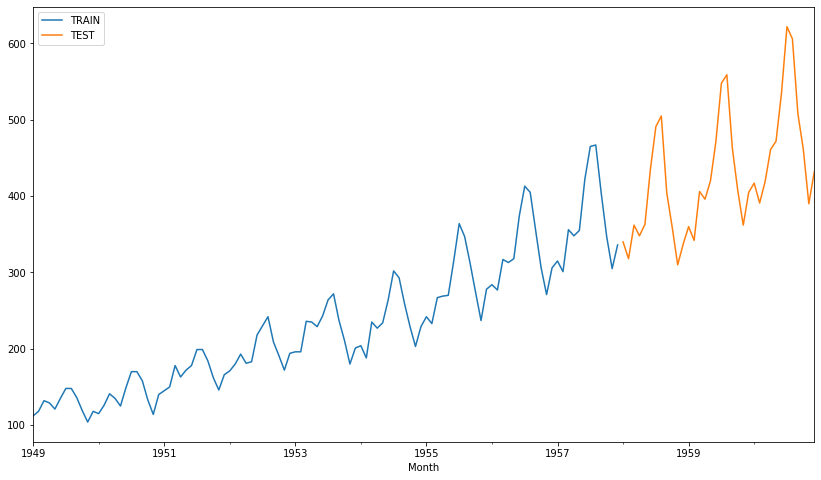

In [8]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(14,8));

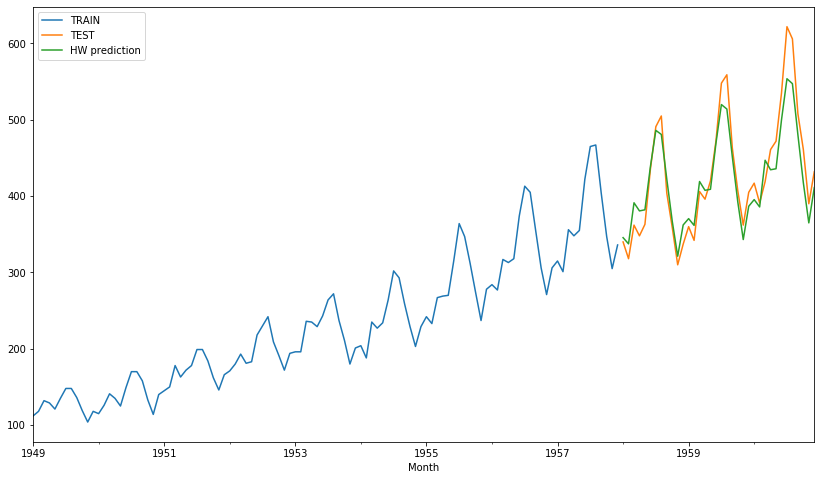

In [9]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(14,8))
test_predictions.plot(legend=True, label='HW prediction');

## Evaluating Metrics

In [10]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [11]:
mean_absolute_error(test_data, test_predictions)

22.305902478217476

In [12]:
mean_squared_error(test_data, test_predictions)

710.6568649728389

In [13]:
np.sqrt(mean_squared_error(test_data, test_predictions))

26.658148190991042

In [14]:
test_data.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


Compared to the mean number of passengers (428.5 thousands of people), 26 is not bad.

## Forecast into Future

In [15]:
final_model = ExponentialSmoothing(df['Thousands of Passengers'],trend='add', seasonal='mul', seasonal_periods=12).fit()

In [16]:
forecast_predictions = final_model.forecast(36)

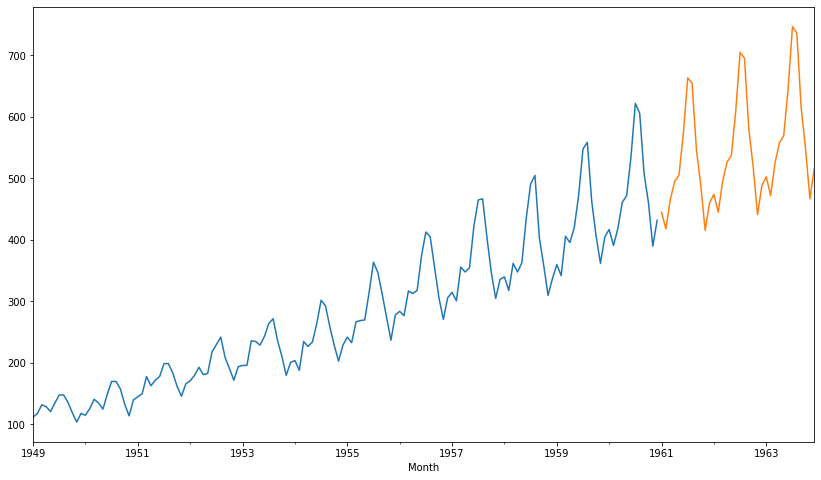

In [17]:
df['Thousands of Passengers'].plot(figsize=(14,8))
forecast_predictions.plot();

## Stationarity

Time series data is said to be stationary if it does not exhibit trends or seasonality. That is, the mean, variance and covariance should be the same for any segment of the series, and are not functions of time.

In [18]:
df2 = pd.read_csv('../Data/samples.csv',index_col=0,parse_dates=True)
df2.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


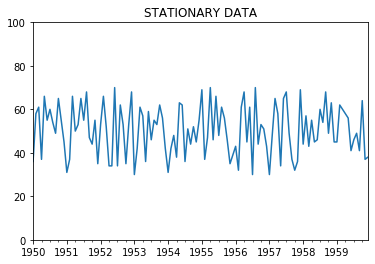

In [19]:
df2['a'].plot(ylim=[0,100],title="STATIONARY DATA").autoscale(axis='x',tight=True);

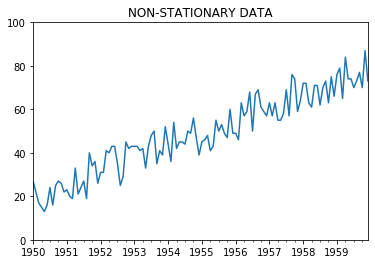

In [20]:
df2['b'].plot(ylim=[0,100],title="NON-STATIONARY DATA").autoscale(axis='x',tight=True);

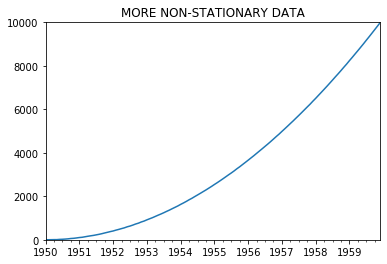

In [21]:
df2['c'].plot(ylim=[0,10000],title="MORE NON-STATIONARY DATA").autoscale(axis='x',tight=True);

## Differencing

### First Order Differencing

Non-stationary data can be made to look stationary through <em>differencing</em>. A simple method called <em>first order differencing</em> calculates the difference between consecutive observations.

&nbsp;&nbsp;&nbsp;&nbsp;$y^{\prime}_t = y_t - y_{t-1}$

In this way a linear trend is transformed into a horizontal set of values.

In [22]:
# Calculate the first difference of the non-stationary dataset "b"
df2['d1b'] = df2['b'] - df2['b'].shift(1)

df2[['b','d1b']].head()

,b,d1b
1950-01-01,27,NaN
1950-02-01,22,-5.0
1950-03-01,17,-5.0
1950-04-01,15,-2.0
1950-05-01,13,-2.0


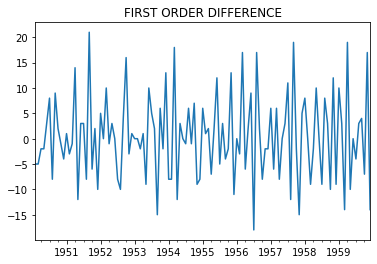

In [23]:
df2['d1b'].plot(title='FIRST ORDER DIFFERENCE').autoscale(axis='x',tight=True);

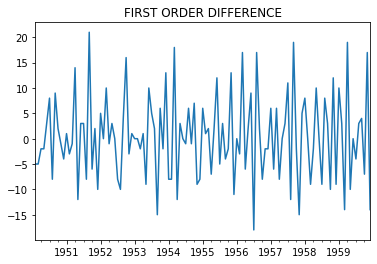

In [24]:
# An easier way of performing differencing on a Pandas Series or DataFrame is to use the built-in .diff() method
df2['d1b'] = df2['b'].diff()

df2['d1b'].plot(title='FIRST ORDER DIFFERENCE').autoscale(axis='x',tight=True);

### Forecasting on first order differenced data

When forecasting with first order differences, the predicted values have to be added back in to the original values in order to obtain an appropriate forecast.

Let's say that the next five forecasted values after applying some model to df['d1b'] are [7,-2,5,-1,12]. We need to perform an inverse transformation to obtain values in the scale of the original time series.

In [25]:
# The forcast starts at the most recent date in the training set.

df2['b'].tail(3)

1959-10-01    70
1959-11-01    87
1959-12-01    73
Name: b, dtype: int64

In [26]:
# Nest set a DateTime index for the forecast set that extends 5 periods into the future
idx = pd.date_range('1960-01-01', periods=5, freq='MS')
z = pd.DataFrame([7,-2,5,-1,12],index=idx,columns=['Fcast'])

The idea behind an inverse transformation is to start with the most recent value from the training set, and to add a cumulative sum of Fcast values to build the new forecast set. For this we'll use the pandas .cumsum() function which does the reverse of .diff()

In [27]:
z['forecast']=df2['b'].iloc[-1] + z['Fcast'].cumsum()
z

,Fcast,forecast
1960-01-01,7,80
1960-02-01,-2,78
1960-03-01,5,83
1960-04-01,-1,82
1960-05-01,12,94


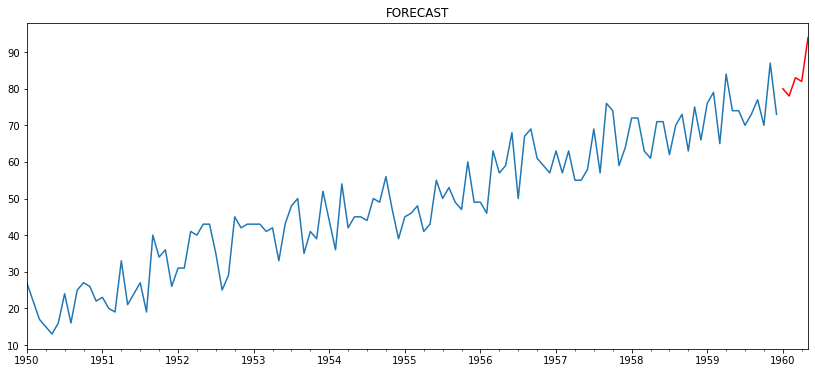

In [31]:
df2['b'].plot(figsize=(14,6), title="FORECAST").autoscale(axis='x',tight=True)

z['forecast'].plot(c='r');

### Second order differencing

Sometimes the first difference is not enough to attain stationarity, particularly if the trend is not linear. We can difference the already differenced values again to obtain a second order set of values.

&nbsp;&nbsp;&nbsp;&nbsp;$\begin{split}y_{t}^{\prime\prime} &= y_{t}^{\prime} - y_{t-1}^{\prime} \\
&= (y_t - y_{t-1}) - (y_{t-1} - y_{t-2}) \\
&= y_t - 2y_{t-1} + y_{t-2}\end{split}$

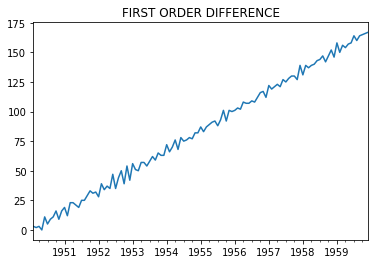

In [32]:
# First we'll look at the first order difference of dataset "c"
df2['d1c'] = df2['c'].diff()

df2['d1c'].plot(title="FIRST ORDER DIFFERENCE").autoscale(axis='x',tight=True);

It is still not stationary, let's perform a second order differencing to dataset 'c'

In [36]:
# We can do this from the original time series in one step
# This is different from df2['c'].diff(2), which would provide a first order difference spaced 2 lags apart.
# We'll use this technique later to address seasonality.
df2['d2c'] = df2['c'].diff().diff()

df2[['c','d1c','d2c']].head()

,c,d1c,d2c
1950-01-01,0,NaN,NaN
1950-02-01,3,3.0,NaN
1950-03-01,5,2.0,-1.0
1950-04-01,8,3.0,1.0
1950-05-01,8,0.0,-3.0


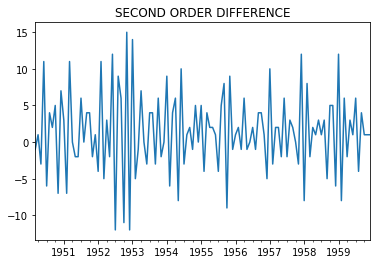

In [34]:
df2['d2c'].plot(title="SECOND ORDER DIFFERENCE").autoscale(axis='x',tight=True);

### Forecasting on second order differenced data

As before, the prediction values have to be added back in to obtain an appropriate forecast.

To invert the second order transformation and obtain forecasted values for $\hat y_t$ we have to solve the second order equation for $y_t$:

&nbsp;&nbsp;&nbsp;&nbsp;$\begin{split}y_{t}^{\prime\prime} &= y_t - 2y_{t-1} + y_{t-2} \\
y_t &= y_{t}^{\prime\prime} + 2y_{t-1} - y_{t-2}\end{split}$

Let's say that the next five forecasted values after applying some model to <tt>df['d2c']</tt> are <tt>[7,-2,5,-1,12]</tt>.

In [37]:
idx = pd.date_range('1960-01-01', periods=5, freq='MS')
z = pd.DataFrame([7,-2,5,-1,12],index=idx,columns=['Fcast'])
z

,Fcast
1960-01-01,7
1960-02-01,-2
1960-03-01,5
1960-04-01,-1
1960-05-01,12


In [38]:
forecast = []

# Capture the two most recent values from the training set
v2,v1 = df2['c'].iloc[-2:]

# Apply the formula
for i in z['Fcast']:
    newval = i + 2*v1 - v2
    forecast.append(newval)
    v2,v1 = v1,newval

z['forecast']=forecast
z

,Fcast,forecast
1960-01-01,7,10174
1960-02-01,-2,10346
1960-03-01,5,10523
1960-04-01,-1,10699
1960-05-01,12,10887


Another, perhaps more straightforward method is to create a first difference set from the second, then build the forecast set from the first difference. We'll again use the pandas <tt>.cumsum()</tt> function which does the reverse of <tt>.diff()</tt>

In [39]:
# Add the most recent first difference from the training set to the Fcast cumulative sum
z['firstdiff'] = (df2['c'].iloc[-1]-df2['c'].iloc[-2]) + z['Fcast'].cumsum()

# Now build the forecast values from the first difference set
z['forecast'] = df2['c'].iloc[-1] + z['firstdiff'].cumsum()

z[['Fcast','firstdiff','forecast']]

,Fcast,firstdiff,forecast
1960-01-01,7,174,10174
1960-02-01,-2,172,10346
1960-03-01,5,177,10523
1960-04-01,-1,176,10699
1960-05-01,12,188,10887


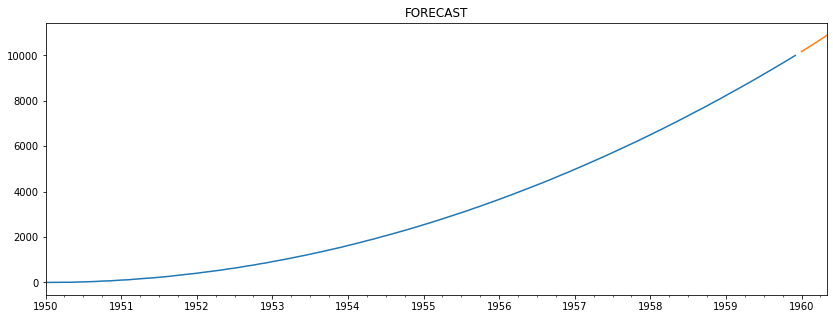

In [41]:
df2['c'].plot(figsize=(14,5), title="FORECAST").autoscale(axis='x',tight=True)

z['forecast'].plot();

<div class="alert alert-danger"><strong>NOTE:</strong> statsmodels has a built-in differencing tool:<br>
    
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;from statsmodels.tsa.statespace.tools import diff<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;df2['d1'] = diff(df2['b'],k_diff=1)</font></tt><br><br>
    
that performs the same first order differencing operation shown above. We chose not to use it here because seasonal differencing is somewhat complicated. To difference based on 12 lags, the code would be<br><br>

<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;df2['d12'] = diff(df2['b'],k_diff=0,k_seasonal_diff=1,seasonal_periods=12)
</font></tt><br><br>

whereas with pandas it's simply<br><br>

<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;df2['d12'] = df2['b'].diff(12)
</font></tt>
</div>

## Lagging
Also known as "backshifting", lagging notation reflects the value of $y$ at a prior point in time. This is a useful technique for performing <em>regressions</em> 

\begin{split}L{y_t} = y_{t-1} & \text{      one lag shifts the data back one period}\\
L^{2}{y_t} = y_{t-2} & \text{      two lags shift the data back two periods} \end{split}
<br><br>
<table>
<tr><td>$y_t$</td><td>6</td><td>8</td><td>3</td><td>4</td><td>9</td><td>2</td><td>5</td></tr>
<tr><td>$y_{t-1}$</td><td>8</td><td>3</td><td>4</td><td>9</td><td>2</td><td>5</td></tr>
<tr><td>$y_{t-2}$</td><td>3</td><td>4</td><td>9</td><td>2</td><td>5</td></tr>
</table>